In [91]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

ZYAM Index Range = 6 to 8
6
pp File: ../InputData/pT_Rebin_1_16dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_1_16dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root


In [92]:
Corrs = ROOT_to_nparray()

In [93]:
print_from_Dict(Corrs)
#Plot_UB()

pp_CSR:
0.4595 0.4623 0.4200 0.4023 0.4128 0.3903 0.3712 0.3832 0.4077 0.4212 0.4495 0.4467 0.4820 0.5170 0.5956 0.5980 
0.3596 0.3175 0.2772 0.2710 0.2412 0.2553 0.2615 0.2688 0.2779 0.2794 0.3067 0.3215 0.3423 0.3895 0.4291 0.4629 
0.1932 0.1642 0.1441 0.1266 0.1267 0.1162 0.1191 0.1190 0.1284 0.1447 0.1502 0.1667 0.1882 0.2576 0.2775 0.2927 
0.0730 0.0562 0.0585 0.0423 0.0486 0.0469 0.0377 0.0585 0.0519 0.0488 0.0625 0.0669 0.0928 0.1149 0.1500 0.1749 
0.0187 0.0179 0.0232 0.0135 0.0144 0.0132 0.0157 0.0144 0.0189 0.0188 0.0220 0.0284 0.0379 0.0567 0.0762 0.0911 
0.0044 0.0048 0.0051 0.0048 0.0055 0.0041 0.0045 0.0039 0.0063 0.0078 0.0070 0.0079 0.0111 0.0160 0.0285 0.0402 
0.0005 0.0013 0.0007 0.0006 0.0009 0.0006 0.0012 0.0018 0.0004 0.0014 0.0015 0.0027 0.0033 0.0057 0.0070 0.0107 

pp_CBR:
0.4117 0.3666 0.3405 0.3192 0.3025 0.2915 0.2858 0.2964 0.3120 0.3184 0.3301 0.3466 0.3698 0.4014 0.4419 0.4582 
0.3091 0.2633 0.2343 0.2005 0.1933 0.1919 0.1928 0.2006 0.2076 0.2115 0.2190 0.

In [94]:
reload(functions_correlations)
from functions_correlations import *

pp
0.0861061181227
0.0684696883595
0.0238682936909
0.0111025811182
0.0030289870154
-8.79440965765e-05
0.000522510897505
p-Pb
0.272968653978
0.177436701507
0.0746079902885
0.0271876717457
0.00828040826094
0.000693068316914
0.00012662876171
-------------- After Pedestal Subtraction -----------
pp_CSR:
-0.0384 0.0096 -0.0066 -0.0030 0.0242 0.0127 -0.0007 0.0007 0.0096 0.0168 0.0333 0.0140 0.0262 0.0295 0.0676 0.0536 
-0.0180 -0.0143 -0.0256 0.0021 -0.0206 -0.0052 0.0002 -0.0002 0.0019 -0.0006 0.0192 0.0185 0.0055 0.0276 0.0252 0.0438 
-0.0075 0.0138 -0.0007 0.0045 0.0097 0.0014 0.0033 -0.0033 0.0038 0.0105 0.0062 0.0109 0.0130 0.0570 0.0355 0.0253 
-0.0006 -0.0013 0.0024 -0.0057 0.0016 -0.0037 -0.0088 0.0088 -0.0000 -0.0079 0.0018 -0.0019 0.0125 0.0138 0.0245 0.0171 
-0.0012 0.0027 0.0059 -0.0016 0.0013 -0.0025 0.0009 -0.0009 0.0013 -0.0003 -0.0027 0.0034 0.0061 0.0140 0.0145 0.0136 
0.0009 0.0014 0.0013 0.0019 0.0030 -0.0008 -0.0003 0.0003 0.0023 0.0027 0.0004 0.0009 0.0018 0.0016 0.0054

<Figure size 1728x864 with 0 Axes>

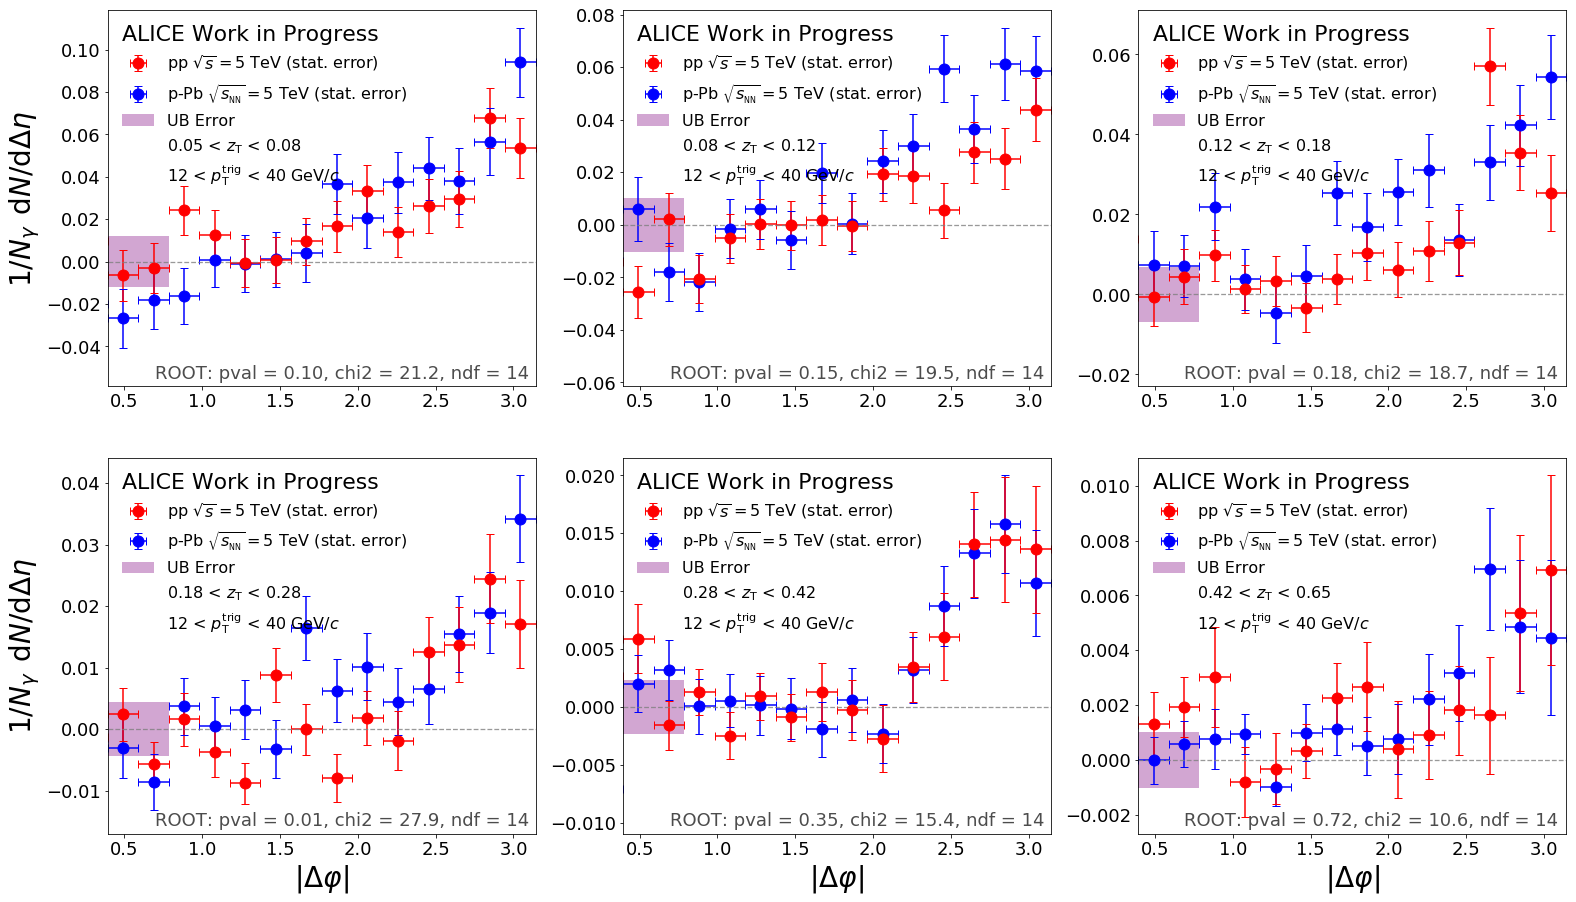

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10

In [95]:
Show_Plots = True

Correlated_Subtraction_Weights(Corrs)
#print("-------------- After Correlated Subtraction -----------")
#print_from_Dict(Corrs)

#if (Show_Plots):
#    Plot_UB_Subtraction(Corrs)

Ped_Sub_After_Cs(Corrs)
print("-------------- After Pedestal Subtraction -----------")
print_from_Dict(Corrs)

if (Show_Plots):
    Plot_pp_pPb_Cs(Corrs)

$C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [ ]:
Frags = Get_Fragmentation(Corrs)
print_from_Dict(Frags)

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [16]:
Combined_Frags = Average_FF(Frags)
print(Combined_Frags["pp_Combined_FF"])

saved to npy_files/LO_pp_Averaged_Fragmentation_Functions_pT_Rebin_1.npy
saved to npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_pT_Rebin_1.npy
[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
  0.01220589]


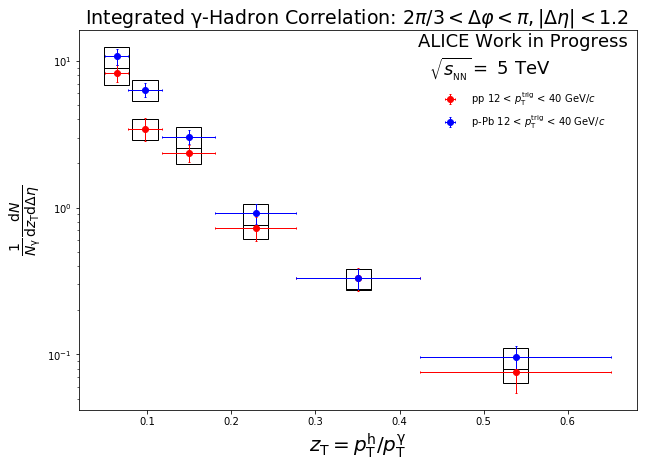

                    pp Central Values:
[ 8.21925078  3.44718497  2.35837024  0.72845753  0.33052268  0.07626868]

                    pp Stat. Uncertainty:
[ 1.09898521  0.60504108  0.29742006  0.1330865   0.0605339   0.02143647]

                    p-Pb Central Values:
[ 10.70882314   6.35397523   3.04628458   0.91598439   0.33131725
   0.09547548]

                    p-Pb Stat. Uncertainty:
[ 1.28590763  0.70923557  0.33275295  0.13867731  0.05343226  0.018871  ]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 13\%-66\% & 11\%-44\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [10]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

[ 0.44023175  0.3654068   0.3016834   0.25744169  0.24354091  0.26480319
  0.31416856  0.38086171  0.4573642   0.53951921  0.62510203  0.71287918
  0.8021306   0.89241407  0.9834454   1.07503463  1.1670504   1.25939923
  1.35201288  0.44023175]


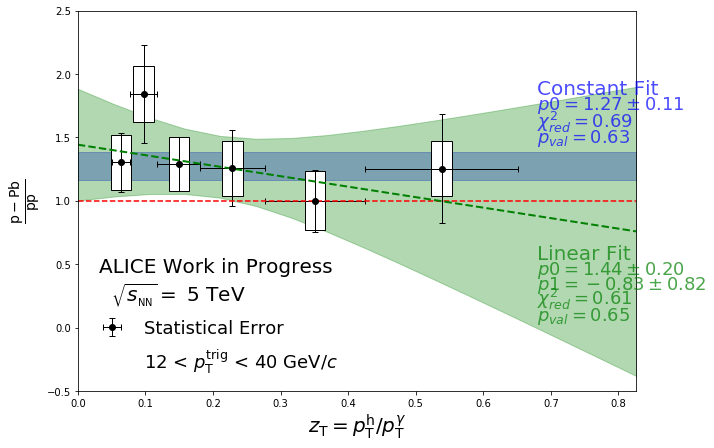

                Central Values:
[ 1.84323594  1.29169056  1.25743005  1.00240396  1.25183081  1.05701169]

                Ratio Uncertainty from Purity:
[ 0.17554529  0.19513649  0.19714574  0.21795182  0.19748784  0.21241001]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.13033646  0.09133632  0.08891373  0.07088066  0.08851781  0.07474201]

                Full Systematic Uncertainty:
[ 0.21864067  0.21545434  0.21626857  0.22918784  0.21641823  0.22517633]

****************************************
Minimizer is Linear
Chi2                      =      3.46474
NDf                       =            5
p0                        =      1.27319   +/-   0.111856    

****************************************
Minimizer is Linear
Chi2                      =      2.45553
NDf                       =            4
p0                        =      1.44262   +/-   0.202372    
p1                        =    -0.827129   +/-   0.823346    


In [42]:
pp_pPB_Avg_Ratio(Combined_Frags,0)